In [1]:

import ast
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\JA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\JA\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Dec 24 13:46:28 2024).


In [3]:
#only get data analyst jobs in the US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst')  & (df['job_country'] == 'United States')].copy()

In [ ]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

In [11]:
df_DA_skills= df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skills_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skills_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skills_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


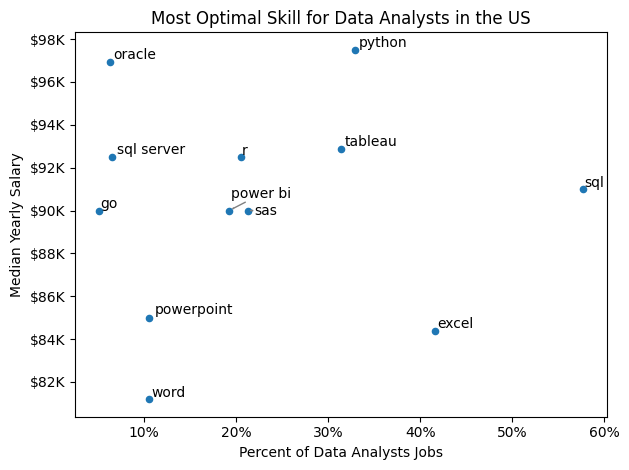

In [19]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skills_percent', y='median_salary')

#Prepare texts for adjustText

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

#set axis labels, title, and legend
plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skill for Data Analysts in the US')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#adjust layout and display plot
plt.tight_layout()
plt.show()